In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# Text Vectorization and tfidf
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# data preprocessing
from sklearn.preprocessing import LabelEncoder
# Classification models
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
# Training and testing data split
from sklearn.model_selection import train_test_split
# Performance matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
import warnings
%matplotlib inline

In [3]:
# Loading the data
data = pd.read_csv('cleanedmrdata.csv')
data.head()

,author,comment.count,date,text,title,wordcount,time,CurrentAffairs,Education,Music,...,Science,History,Law,Games,Books,FoodandDrink,DataSource,WebTech,Economics,Medicine
0,Tyler Cowen,27.0,"January1,2010",Matt Yglesias calculates:\n\nâ€¦monitoring the...,Terrorists and false positives,133.0,2016-09-17 16:23:00,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,Tyler Cowen,18.0,"January1,2010",Today is Public Domain day and James Boyle rep...,Public Domain Day,224.0,2016-09-17 12:18:00,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,Alex Tabarrok,8.0,"January1,2010",Is there any drug that helps more conditions w...,Markets in Everything: Placebos,32.0,2016-09-17 10:59:00,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Tyler Cowen,28.0,"January1,2010","\nAs of January 1, 2010, we are changing our n...",Peter Boettkeâ€™s announcement,127.0,2016-09-17 09:35:00,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Tyler Cowen,8.0,"January1,2010","From Joanne McNeil, this is one of my favorite...",How to capture an idea,294.0,2016-09-17 05:12:00,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
data.tail(n=50)

,author,comment.count,date,text,title,wordcount,time,CurrentAffairs,Education,Music,...,Science,History,Law,Games,Books,FoodandDrink,DataSource,WebTech,Economics,Medicine
12770,Tyler Cowen,28.0,"September6,2016",There are separate issues that get muddled up ...,"From the comments, Joseph Henrich on group sel...",222.0,2016-09-17 00:31:00,0,0,0,...,1,1,0,0,0,0,0,0,0,0
12771,Tyler Cowen,56.0,"September7,2016",There is a new NBER paper on this topic by Fal...,Does Chinese parental matchmaking matter?,178.0,2016-09-17 14:28:00,0,1,0,...,0,0,0,0,0,0,1,0,1,0
12772,Tyler Cowen,102.0,"September7,2016",That is the topic of my latest Bloomberg colum...,Does supply-side economics deserve a second look?,351.0,2016-09-17 10:54:00,0,0,0,...,0,0,0,0,1,0,0,0,1,0
12773,Tyler Cowen,110.0,"September7,2016",1. Chess with tractors and harvesters.Â And c...,Wednesday assorted links,99.0,2016-09-17 04:45:00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12774,Tyler Cowen,65.0,"September7,2016","I loved this book, the author is Andrew Scott ...",*The Fall of Heaven*,240.0,2016-09-17 00:43:00,0,0,0,...,0,1,0,0,1,0,0,0,0,0
12775,Tyler Cowen,67.0,"September8,2016",1. Who needs the standing desk when youâ€™ve g...,Thursday assorted links,77.0,2016-09-17 14:05:00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12776,Tyler Cowen,66.0,"September8,2016","That is my latest column for Bloomberg, here i...",What is the social value of Uber?,341.0,2016-09-17 11:32:00,0,0,0,...,0,0,0,0,0,0,1,0,1,0
12777,Alex Tabarrok,142.0,"September8,2016",Barack Obamaâ€™s campaign adopted data butÂ Hi...,The Irony of Hillary Clintonâ€™s Data Analytics,469.0,2016-09-17 07:27:00,1,0,0,...,0,0,0,0,0,0,1,0,1,0
12778,Tyler Cowen,28.0,"September8,2016",Straussâ€™s pedagogical method was famous for ...,Straussâ€™s pedagogical method,244.0,2016-09-17 03:18:00,0,1,0,...,0,1,0,0,1,0,0,0,0,0
12779,Tyler Cowen,14.0,"September8,2016",Why stick with that NGO when global markets be...,"Those new service sector jobs, installment #14...",315.0,2016-09-17 00:43:00,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
# Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12820 entries, 0 to 12819
Data columns (total 22 columns):
author              12820 non-null object
comment.count       12796 non-null float64
date                12820 non-null object
text                12798 non-null object
title               12818 non-null object
wordcount           12787 non-null float64
time                12820 non-null object
CurrentAffairs      12820 non-null int64
Education           12820 non-null int64
Music               12820 non-null int64
Philosophy          12820 non-null int64
PoliticalScience    12820 non-null int64
Science             12820 non-null int64
History             12820 non-null int64
Law                 12820 non-null int64
Games               12820 non-null int64
Books               12820 non-null int64
FoodandDrink        12820 non-null int64
DataSource          12820 non-null int64
WebTech             12820 non-null int64
Economics           12820 non-null int64
Medicine            1

In [6]:
# counting the null values
data.isnull().sum()

author               0
comment.count       24
date                 0
text                22
title                2
wordcount           33
time                 0
CurrentAffairs       0
Education            0
Music                0
Philosophy           0
PoliticalScience     0
Science              0
History              0
Law                  0
Games                0
Books                0
FoodandDrink         0
DataSource           0
WebTech              0
Economics            0
Medicine             0
dtype: int64

Null data are very less, so we can remove the null values row wise

In [7]:
# Removing the data row wise
data.dropna(axis=0,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12763 entries, 0 to 12819
Data columns (total 22 columns):
author              12763 non-null object
comment.count       12763 non-null float64
date                12763 non-null object
text                12763 non-null object
title               12763 non-null object
wordcount           12763 non-null float64
time                12763 non-null object
CurrentAffairs      12763 non-null int64
Education           12763 non-null int64
Music               12763 non-null int64
Philosophy          12763 non-null int64
PoliticalScience    12763 non-null int64
Science             12763 non-null int64
History             12763 non-null int64
Law                 12763 non-null int64
Games               12763 non-null int64
Books               12763 non-null int64
FoodandDrink        12763 non-null int64
DataSource          12763 non-null int64
WebTech             12763 non-null int64
Economics           12763 non-null int64
Medicine            1

## ***Percentage of Blog Post With Tag***

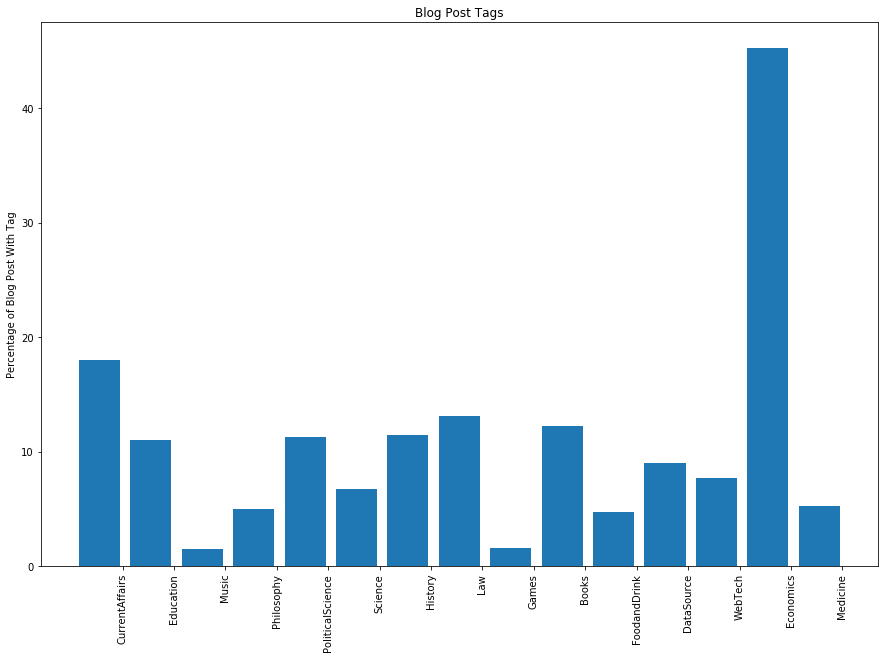

In [8]:
percents = data.iloc[:, 7:].mean() * 100
plt.figure(figsize=(15, 10))
plt.bar(range(len(percents)), percents)
plt.title("Blog Post Tags")
plt.ylabel("Percentage of Blog Post With Tag")
plt.gca().set_xticklabels(percents.index)
plt.gca().set_xticks(np.arange(len(percents)) + .45)
plt.xticks(rotation=90)
plt.show()

## Post comparision between the two:

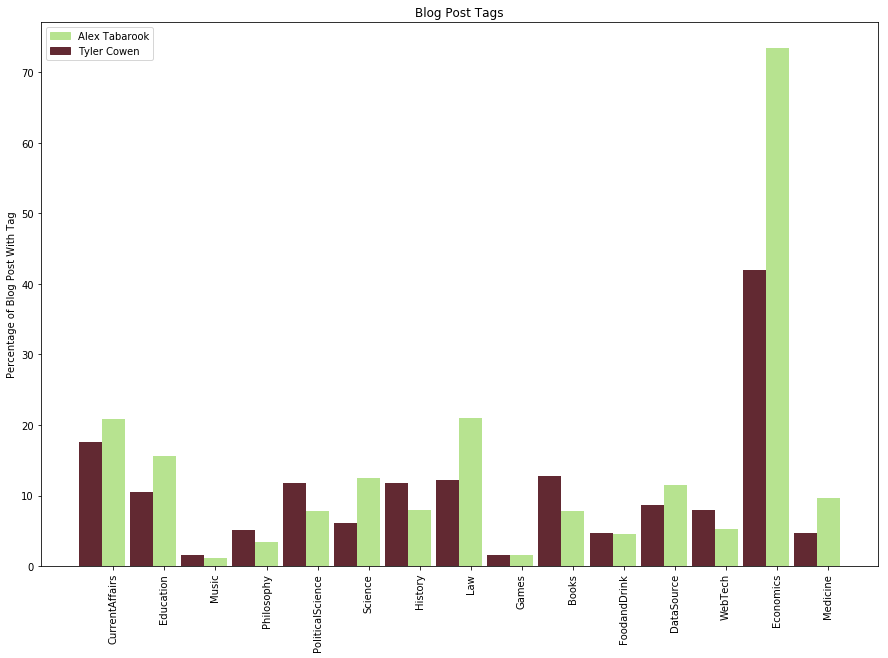

In [9]:
plt.figure(figsize=(15, 10))
t_percents = data[data['author'] == 'Tyler Cowen'].iloc[:, 7:].mean() * 100
a_percents = data[data['author'] == 'Alex Tabarrok'].iloc[:, 7:].mean() * 100
labels = data[data['author'] == 'Tyler Cowen'].iloc[:, 7:].mean().index
t_color = np.random.rand(3)
a_color = np.random.rand(3)
handles = [patches.Patch(label='Alex Tabarook', color=a_color), patches.Patch(label='Tyler Cowen', color=t_color)]
ind = np.arange(len(t_percents))
plt.bar(ind, t_percents, width=.45, color=t_color)
plt.bar(ind+.45, a_percents, width=.45, color=a_color)
plt.gca().set_xticklabels(labels)
plt.gca().set_xticks(ind + .45)
plt.legend(handles=handles)
plt.xticks(rotation=90)
plt.title("Blog Post Tags")
plt.ylabel("Percentage of Blog Post With Tag")
plt.show()

## Who wrotes long posts???

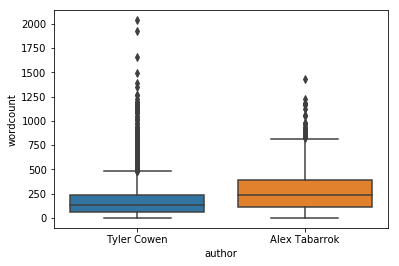

In [10]:
sns.boxplot(x='author', y='wordcount', data=data)
#plt.figure(figsize=(15, 10))
plt.show()

## Predicting author based on the texts

In [11]:
vectorizer = TfidfVectorizer().fit(data['text'])
feature_vect = vectorizer.transform(data['text'])
target_vect = LabelEncoder().fit_transform(data['author'])

In [12]:
train_features,test_features,train_targets,test_targets = train_test_split( feature_vect, target_vect, test_size=0.33, random_state=42)

In [13]:
'''train_features = feature_vect[:8000]
test_features = feature_vect[8000:]
train_targets = target_vect[:8000]
test_targets = target_vect[8000:]'''

'train_features = feature_vect[:8000]\ntest_features = feature_vect[8000:]\ntrain_targets = target_vect[:8000]\ntest_targets = target_vect[8000:]'

In [14]:
# Random Forest Classifier
clf_rf = RandomForestClassifier()

In [15]:
#Traing my model
clf_rf.fit(train_features, train_targets)

#Making the prediction
Pridicted_test_targets = clf_rf.predict(test_features)

#Measuring the accuracy of machine
acc_rf = accuracy_score(test_targets, Pridicted_test_targets)
print ("random forest accuracy: ",acc_rf)

random forest accuracy:  0.901234567901


In [16]:
#Cross Validation
cross_val=cross_val_score(clf_rf, train_features, train_targets, cv=3, scoring="accuracy")
print(cross_val)
y_train_pred = cross_val_predict(clf_rf, train_features, train_targets, cv=3)
print(y_train_pred)

[ 0.89687829  0.90385965  0.90526316]
[1 1 1 ..., 1 1 1]


In [17]:
#Confussion matrix
conf_mx=confusion_matrix(train_targets, y_train_pred)
print("Confussion matrix:",conf_mx)
ps=precision_score(train_targets, y_train_pred,average="macro")
print("Precision Score:",ps)
rs=recall_score(train_targets, y_train_pred,average="macro")
print("Recall Score:",rs)

Confussion matrix: [[  46  839]
 [  12 7654]]
Precision Score: 0.847158105864
Recall Score: 0.52520602381


Here i am showing you the graph of the confussion matrix. more the bright more erroneous it is. so by getting the confussion matrix graph we canlearn from it and we can change the values of classifier or by removing the noise from the images we can get the optimized result

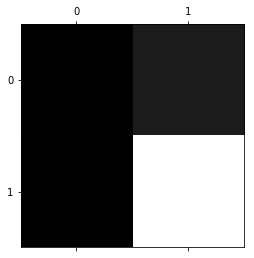

____________________________________________________________________________________________________


In [18]:
# plotting the confussion matrix
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()
print("_"*100)

In [19]:
# roc curve score
roc_auc_score(test_targets, Pridicted_test_targets)

0.5455747469647908

In [20]:
#Preparing ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_targets, Pridicted_test_targets)
roc_auc = auc(false_positive_rate, true_positive_rate)

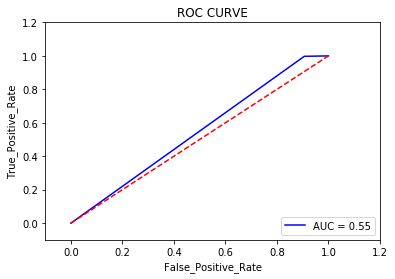

In [21]:
#Plotting ROC Curve
plt.title('ROC CURVE')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True_Positive_Rate')
plt.xlabel('False_Positive_Rate')
plt.show()

In [22]:
# output data
my_submission = pd.DataFrame({'author': Pridicted_test_targets})
my_submission.to_csv('AutrorProfilingRandomForest.csv', index=False)

In [23]:
#Support vector classifier
clf_svm = LinearSVC()

#Training the model
clf_svm.fit(train_features, train_targets)
#Measuring the accuracy of machine
acc_svc = accuracy_score(test_targets, Pridicted_test_targets)
print ("SVC accuracy: ",acc_svc)

SVC accuracy:  0.901234567901


In [24]:
#Cross Validation
cross_val=cross_val_score(clf_svm, train_features, train_targets, cv=3, scoring="accuracy")
print(cross_val)
y_train_pred = cross_val_predict(clf_svm, train_features, train_targets, cv=3)
print(y_train_pred)

[ 0.93090144  0.92526316  0.92912281]
[1 1 1 ..., 1 1 1]


In [25]:
#Confussion matrix
conf_mx=confusion_matrix(train_targets, y_train_pred)
print("Confussion matrix:",conf_mx)
ps=precision_score(train_targets, y_train_pred,average="macro")
print("Precision Score:",ps)
rs=recall_score(train_targets, y_train_pred,average="macro")
print("Recall Score:",rs)

Confussion matrix: [[ 298  587]
 [  25 7641]]
Precision Score: 0.925629429675
Recall Score: 0.666731005349


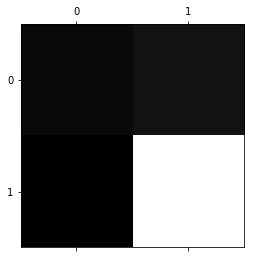

____________________________________________________________________________________________________


In [26]:
# plotting the confussion matrix
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()
print("_"*100)

In [27]:
# ROC Score
roc_auc_score(test_targets, Pridicted_test_targets)

0.5455747469647908

In [28]:
#Preparing ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_targets, Pridicted_test_targets)
roc_auc = auc(false_positive_rate, true_positive_rate)

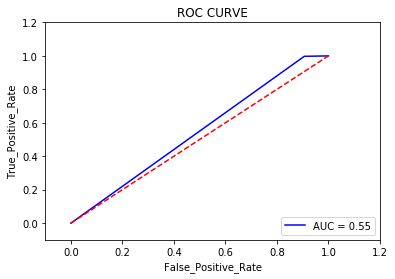

In [29]:
#Plotting ROC Curve
plt.title('ROC CURVE')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True_Positive_Rate')
plt.xlabel('False_Positive_Rate')
plt.show()

In [30]:
# Bernoulli NB model
clf = BernoulliNB()
# training the data
clf.fit(train_features, train_targets)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [31]:
# Accuracy
accuracy_score(test_targets, clf.predict(test_features))

0.88247863247863245

In [32]:
#Cross Validation
cross_val=cross_val_score(clf, train_features, train_targets, cv=3, scoring="accuracy")
print(cross_val)
y_train_pred = cross_val_predict(clf, train_features, train_targets, cv=3)
print(y_train_pred)

[ 0.89512452  0.89473684  0.90245614]
[1 1 1 ..., 1 1 1]


In [33]:
#Confussion matrix
conf_mx=confusion_matrix(train_targets, y_train_pred)
print("Confussion matrix:",conf_mx)
ps=precision_score(train_targets, y_train_pred,average="macro")
print("Precision Score:",ps)
rs=recall_score(train_targets, y_train_pred,average="macro")
print("Recall Score:",rs)

Confussion matrix: [[ 180  705]
 [ 172 7494]]
Precision Score: 0.712688770249
Recall Score: 0.59047654844


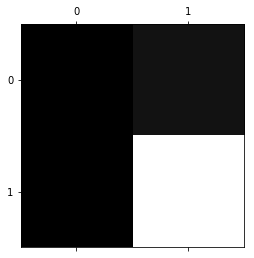

____________________________________________________________________________________________________


In [34]:
# plotting the confussion matrix
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()
print("_"*100)

In [35]:
# ROC Score
roc_auc_score(test_targets, Pridicted_test_targets)

0.5455747469647908

In [36]:
#Preparing ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_targets, Pridicted_test_targets)
roc_auc = auc(false_positive_rate, true_positive_rate)

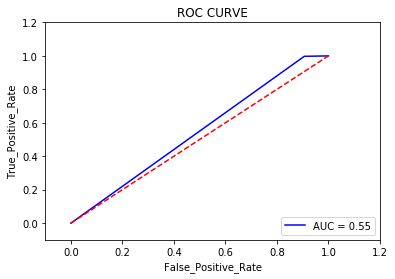

In [37]:
#Plotting ROC Curve
plt.title('ROC CURVE')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True_Positive_Rate')
plt.xlabel('False_Positive_Rate')
plt.show()

In [38]:
# MLP classifier Model
net = MLPClassifier(hidden_layer_sizes = (500, 250))
# Training the model
net.fit(train_features, train_targets)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500, 250), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [39]:
# Accuracy
accuracy_score(test_targets, net.predict(test_features))

0.92473884140550811

In [40]:
#Cross Validation
cross_val=cross_val_score(net, train_features, train_targets, cv=3, scoring="accuracy")
print(cross_val)
y_train_pred = cross_val_predict(net, train_features, train_targets, cv=3)
print(y_train_pred)

[ 0.92178183  0.92701754  0.92526316]
[1 1 1 ..., 1 1 1]


In [41]:
#Confussion matrix
conf_mx=confusion_matrix(train_targets, y_train_pred)
print("Confussion matrix:",conf_mx)
ps=precision_score(train_targets, y_train_pred,average="macro")
print("Precision Score:",ps)
rs=recall_score(train_targets, y_train_pred,average="macro")
print("Recall Score:",rs)

Confussion matrix: [[ 328  557]
 [  74 7592]]
Precision Score: 0.873784226493
Recall Score: 0.680484227811


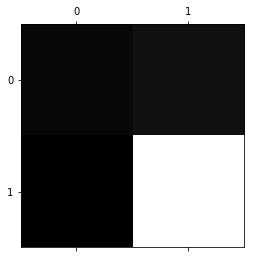

____________________________________________________________________________________________________


In [42]:
# plotting the confussion matrix
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()
print("_"*100)

In [43]:
#ROC Score
roc_auc_score(test_targets, Pridicted_test_targets)

0.5455747469647908

In [44]:
#Preparing ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_targets, Pridicted_test_targets)
roc_auc = auc(false_positive_rate, true_positive_rate)

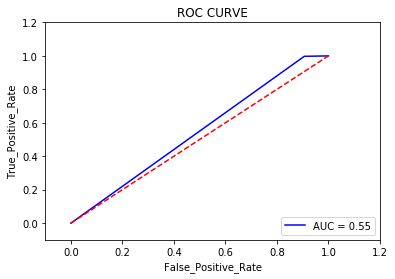

In [45]:
#Plotting ROC Curve
plt.title('ROC CURVE')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True_Positive_Rate')
plt.xlabel('False_Positive_Rate')
plt.show()